In [2]:
import numpy as np
import matplotlib.pyplot as plt
from timeit import default_timer as timer
from dmrgwaytorho import *
import qutip as q
from scipy import integrate,special
from scipy.linalg import eig,eigh,eigvals,eigvalsh
from scipy.sparse.linalg import eigs
import pickle 
from functions import doApplyHam,isingmodel,diagonalize
from functions import isingmodel_rev,isingmodel_rev_frac2


In [5]:
length=16
lambdarange=np.linspace(0.1,2)

In [4]:
dictionary_open0_h1={}
dictionary_open1_h1={}

for l in lambdarange:
    
    Energies,psis=diagonalize(2,length,isingmodel_rev_frac2(l,0.001),False)
    
    reshapedpsi0=psis[:,0].reshape(2**int((length-2)/2),4,2**int((length-2)/2)).transpose(1,0,2).reshape(4,-1)
    
    rhomagn0 = np.dot(reshapedpsi0, reshapedpsi0.conjugate().transpose())
    
    reshapedpsi1=psis[:,1].reshape(2**int((length-2)/2),4,2**int((length-2)/2)).transpose(1,0,2).reshape(4,-1)
    
    rhomagn1 = np.dot(reshapedpsi1, reshapedpsi1.conjugate().transpose())
    
    dictionary_open0_h1[l]=rhomagn0
    
    dictionary_open1_h1[l]=rhomagn1


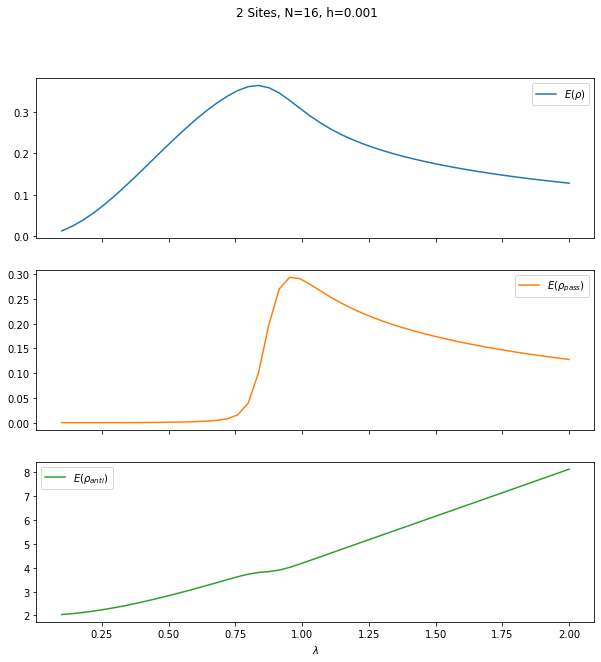

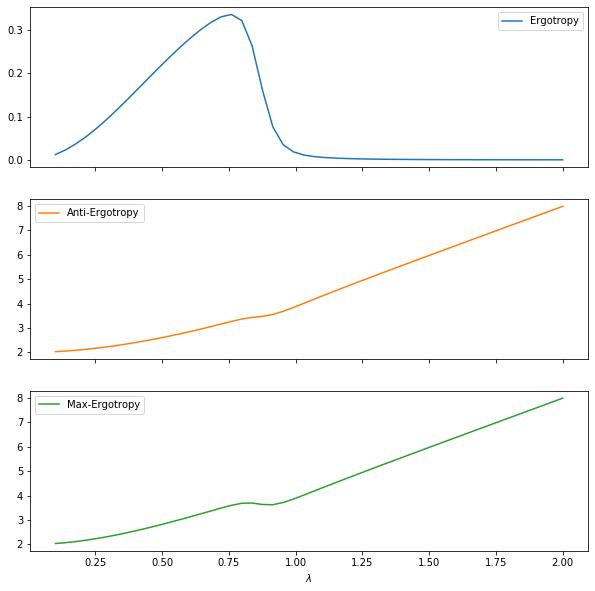

In [10]:
def Hamiltonian(lam):
    return -(q.tensor(q.sigmax(),q.sigmax()))-lam*q.tensor(q.sigmaz(),q.identity(2))-lam*q.tensor(q.identity(2),q.sigmaz())

prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

fig, axs = plt.subplots(3,sharex=True,figsize=[10,10])

energies_pass=[]
energies_subs=[]
energies_antipass=[]

for j,l in enumerate(lambdarange):    

    
    eigval,eigstat=eigh(dictionary_open0_h1[l])

    reduced_H_matr=Hamiltonian(l)
    
    qrho_2=q.Qobj(dictionary_open0_h1[l],dims=[[2,2],[2,2]])
    
    h_eigval, h_eigvec= reduced_H_matr.eigenstates()
    
    rho_pass=q.Qobj()
    rho_anti=q.Qobj()
   
    sortdesc=np.sort(eigval)[::-1]
    
    for i in range(len(eigval)):    
        rho_pass+=sortdesc[i]*q.ket2dm(h_eigvec[i])
        
    for i in range(len(eigval)):    
        rho_anti+=eigval[i]*q.ket2dm(h_eigvec[i])
        
    ener_pass=q.expect(rho_pass,reduced_H_matr)-h_eigval[0]
    ener_subs=q.expect(qrho_2,reduced_H_matr)-h_eigval[0]
    ener_anti=q.expect(rho_anti,reduced_H_matr)-h_eigval[0]
    
    energies_pass.append(ener_pass)
    energies_subs.append(ener_subs)
    energies_antipass.append(ener_anti)

fig.suptitle("2 Sites, N=16, h=0.001")   

axs[0].plot(lambdarange,energies_subs,label=r"$E(\rho)$",color=colors[0])
axs[1].plot(lambdarange,energies_pass,label=r"$E(\rho_{pass})$",color=colors[1])
axs[2].plot(lambdarange,energies_antipass,label=r"$E(\rho_{anti})$",color=colors[2])
for k in range(3):
    axs[k].legend()
plt.xlabel(r"$\lambda$")
plt.savefig("rhos_10_0001")
plt.show()   
fig, axs = plt.subplots(3,sharex=True,figsize=[10,10])

axs[0].plot(lambdarange,(np.array(energies_subs)-np.array(energies_pass)),label="Ergotropy",color=colors[0])
axs[1].plot(lambdarange,(np.array(energies_antipass)-np.array(energies_subs)),label="Anti-Ergotropy",color=colors[1])
axs[2].plot(lambdarange,(np.array(energies_antipass)-np.array(energies_pass)),label="Max-Ergotropy",color=colors[2])

plt.xlabel(r"$\lambda$")
for k in range(3):
    axs[k].legend()
    
plt.savefig("ergo_10_0001")
plt.show()

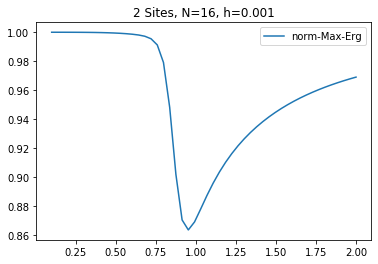

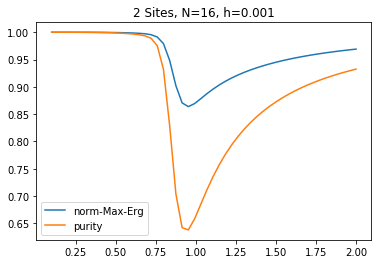

In [13]:
def Hamiltonian(lam):
    return -(q.tensor(q.sigmax(),q.sigmax()))-lam*q.tensor(q.sigmaz(),q.identity(2))-lam*q.tensor(q.identity(2),q.sigmaz())
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']


energies_pass=[]
energies_subs=[]
energies_antipass=[]
norm_mergs=[]

for j,l in enumerate(lambdarange):    

    
    eigval,eigstat=eigh(dictionary_open0_h1[l])

    reduced_H_matr=Hamiltonian(l)
    
    qrho_2=q.Qobj(dictionary_open0_h1[l],dims=[[2,2],[2,2]])
    
    h_eigval, h_eigvec= reduced_H_matr.eigenstates()
    
    rho_pass=q.Qobj()
    rho_anti=q.Qobj()
   
    sortdesc=np.sort(eigval)[::-1]
    
    for i in range(len(eigval)):    
        rho_pass+=sortdesc[i]*q.ket2dm(h_eigvec[i])
        
    for i in range(len(eigval)):    
        rho_anti+=eigval[i]*q.ket2dm(h_eigvec[i])
        
    ener_pass=q.expect(rho_pass,reduced_H_matr)-h_eigval[0]
    ener_subs=q.expect(qrho_2,reduced_H_matr)-h_eigval[0]
    ener_anti=q.expect(rho_anti,reduced_H_matr)-h_eigval[0]
    
    energies_pass.append(ener_pass)
    energies_subs.append(ener_subs)
    energies_antipass.append(ener_anti)
    norm_mergs.append((ener_anti-ener_pass)/(2*abs(h_eigval[0])))
plt.title("2 Sites, N=16, h=0.001")   
plt.plot(lambdarange,norm_mergs,label="norm-Max-Erg")
plt.legend()
plt.savefig("normal_merg")
plt.show()

plt.plot(lambdarange,norm_mergs,label="norm-Max-Erg")
plt.plot(lambdarange,purs,label="purity")

plt.legend()
plt.title("2 Sites, N=16, h=0.001")   
plt.savefig("normal_merg_and_purs")
plt.show()

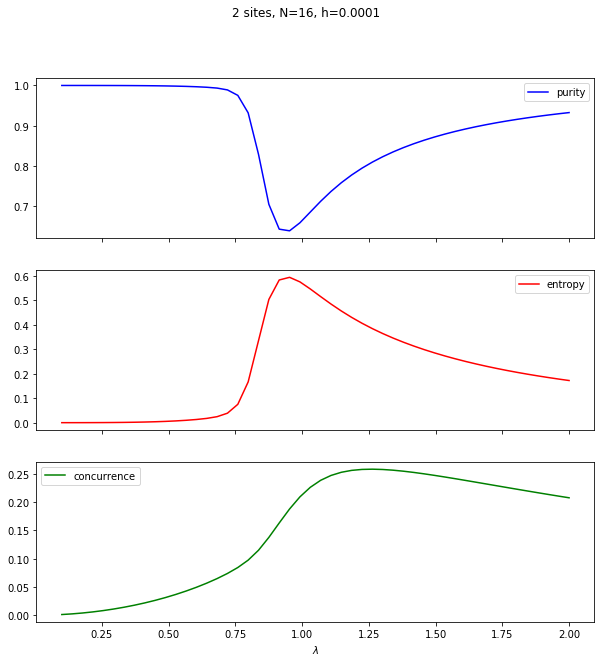

In [11]:
fig, axs = plt.subplots(3,sharex=True,figsize=[10,10])

purs=[]

for j,l in enumerate(lambdarange):    

    
    eigval,eigstat=eigh(dictionary_open0_h1[l])
           
    eigsquared=[x**2 for x in eigval]
        

    purs.append(sum(eigsquared))
    
axs[0].plot(lambdarange,purs,label="purity",color="blue")
axs[0].legend()

entros=[]

for j,l in enumerate(lambdarange):    

    qrho_2=q.Qobj(dictionary_open0_h1[l],dims=[[2,2],[2,2]])

    entr=q.entropy_vn(qrho_2)
           
    entros.append(entr)
    
axs[1].plot(lambdarange,entros,label="entropy",color="red")
axs[1].legend()

concs=[]

for j,l in enumerate(lambdarange):    

    qrho_2=q.Qobj(dictionary_open0_h1[l],dims=[[2,2],[2,2]])

    conc=q.concurrence(qrho_2)
           
    concs.append(conc)
    
axs[2].plot(lambdarange,concs,label="concurrence",color="green")
plt.xlabel(r"$\lambda$")
axs[2].legend()
fig.suptitle("2 sites, N=16, h=0.0001")
plt.savefig("quantities10_0001")
plt.show()